# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [ ]:
! git clone https://github.com/will-mitchell22/labs

fatal: destination path 'labs' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/labs/04_hedonic_pricing/airbnb_hw.csv', low_memory = False)
print(df.shape, '\n')
df.info()
df.head()

(30478, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), in

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [10]:
print(df.isnull().sum())

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64


In [11]:
df.dropna(inplace=True)

<Axes: xlabel='Price', ylabel='Count'>

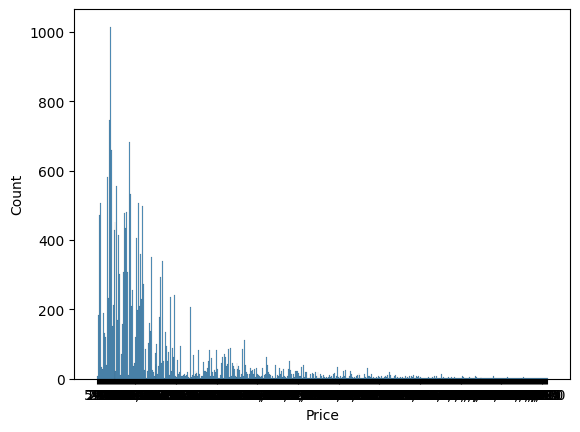

In [12]:
import seaborn as sns
sns.histplot(df['Price'])

<Axes: xlabel='Number Of Reviews', ylabel='Count'>

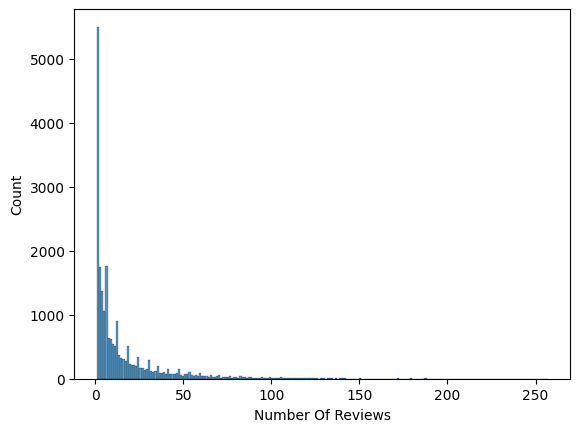

In [16]:
sns.histplot(df['Number Of Reviews'])

In [18]:
df_dummies = pd.get_dummies(df, columns=['Neighbourhood ', 'Property Type', 'Room Type'], drop_first=True)

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [23]:
df['Price'] = df['Price'].replace(',','', regex=True).astype(float)

In [24]:
y = df['Price']
X = df.loc[:, ['Beds', 'Neighbourhood ']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [25]:
Z_train = pd.concat([X_train['Beds'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis=1)
Z_test = pd.concat([X_test['Beds'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis=1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsquared:', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE:', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsquared: 0.2684206711171696
RMSE: 96.64258261364563


,variable,coefficient
0,Beds,54.498296
1,Bronx,-9.585038
2,Brooklyn,40.639123
3,Manhattan,101.327086
4,Queens,11.144532
5,Staten Island,48.206208


In [27]:
y = df['Price']
X = df.loc[:, ['Zipcode', 'Neighbourhood ']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [28]:
Z_train = pd.concat([X_train['Zipcode'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis=1)
Z_test = pd.concat([X_test['Zipcode'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis=1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsquared:', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE:', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsquared: 0.07724315890030264
RMSE: 108.5379091474416


,variable,coefficient
0,Zipcode,-0.100649
1,Bronx,1129.139106
2,Brooklyn,1257.319585
3,Manhattan,1192.979280
4,Queens,1230.244039
5,Staten Island,1191.149581


The model demonstrating the coefficient for Beds does much better than the model demonstrating the coefficient for Zipcode.  This is due to the R squared values and RMSE values being more appropriate, along with the coefficients for each of the Neighbourhoods being more useful to us as well.

In [29]:
df['Beds_Neighbourhood'] = df['Beds'] * df['Neighbourhood ']
y = df['Price']
X = df.loc[:, ['Beds', 'Neighbourhood ', 'Beds_Neighbourhood']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

Z_train = pd.concat([X_train['Beds'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                     X_train['Beds_Neighborhood']], axis=1)

Z_test = pd.concat([X_test['Beds'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    X_test['Beds_Neighborhood']], axis=1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train, y_train)

y_hat = reg.predict(Z_test)
print('Rsquared:', reg.score(Z_test,y_test))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE:', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

TypeError: can't multiply sequence by non-int of type 'float'

This model actually was unable to function due to being unable to multiply the beds variable by neighbourhoods to be able to accurately produce a new transformed variable. In the future I need to use two variables that are not categorical.  This was not able to be compared to my other models, but if it had, I would have been able to see how coefficients are affected through the multiplication of two variables together to see the joint impact that they have on the output of the model.

I would summarize my results as a 3.  I wish that I could have developed better results for my coefficients as well as my R-squared and RMSE values, and that the transformed variable model would have provided the values that I would have liked. However, I have learned about overfitting and underfitting, as well as model selection.  It is important to accurately include the proper variables of the proper type in your model creation, and this can lead to the most accurate results possible and the avoidance of multicolinearity.  Along with this, for model selection, I learned how important it is to have accuratly cleaned variables, and to make sure that when transforming a model to take the proper precautionary steps.